In [21]:
from lo_tools import plotting_functions as lo_plot
from datetime import timedelta
import datetime
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm

In [8]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [2]:
def get_his_fn_from_dt(dt):

    path = Path("/data1/parker/LO_roms")
    # This creates the Path of a history file from its datetime
    if dt.hour == 0:
        # perfect restart does not write the 0001 file
        dt = dt - timedelta(days=1)
        his_num = '0025'
    else:
        his_num = ('0000' + str(dt.hour + 1))[-4:]
    date_string = dt.strftime('%Y.%m.%d')
    fn = path / 'cas6_v0_live' / ('f' + date_string) / ('ocean_his_' + his_num + '.nc')
    return fn

In [3]:
dt = datetime.datetime(2018,1,1)
fn = get_his_fn_from_dt(dt)

In [4]:
x = np.arange(192,319)
y = np.repeat(706,len(x))

all = lo_plot.get_sect(fn,'u',x,y) # don't thik this is the one, did not get any z info

all[0]; # x in the centre of the cell
all[1];  # y
all[2]; # distance in km
all[3]; # i think the same again
all[4]; # jsut all zeros, same with 5
all[6]; # 2 and 3 but with 30 in depth
all[7]; # nans, same with 8
all[9]; # lon, but for whaterver reason jsut so many of them
all[10]; # lats, again.. so many


In [5]:
hm = lo_plot.get_zfull(0,fn,'rho')[:,706,192:319] # i think this is it!

In [6]:
lo = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/back_20180309/ariane_positions_quantitative.nc')

In [32]:
# def FluxEW(mydata, section, lonW, lonE, fjgrid, maxdepth, distlabel, ax):
y = 706
xmin = 192
xmax = 319

mydata = lo

time = np.abs(np.max(mydata.init_t)-np.min(mydata.init_t))

dist = lo_plot.get_sect(fn,'u',np.arange(xmin,xmax),np.repeat(y,(xmax-xmin)))[6]
z = np.abs(lo_plot.get_zfull(0,fn,'rho')[:,y,xmin:xmax][::-1])
z = np.delete(z,0,0)

depths = mydata.final_depth[(mydata.final_section==4)]
transports = mydata.final_transp[(mydata.final_section==4)]/time
lons = mydata.final_lon[(mydata.final_section==4)]

(0.0, 500.0)

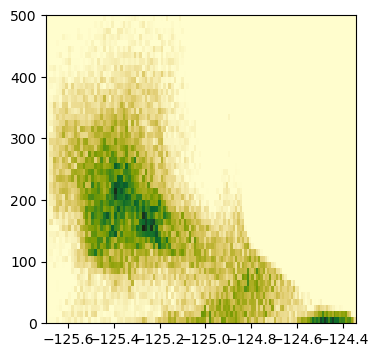

In [33]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
# vmin = t_min, vmax=t_max, 


H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(grid.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(grid.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, density= True)

ax.set_ylim([0,500])

In [31]:
np.max(lo.final_depth)

<xarray.DataArray 'final_depth' ()>
array(607.83913533)

In [35]:
np.max(H)

0.014323224875277025